# Cardiovascular Disease Dataset Description

In [94]:
"""

https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease/data

The primary aim is to predict the presence or absence of cardiovascular disease based on various patient metrics

# Variables
ID                       | Unique identifier for each patient.
age                      | Age of the patient in days.
age_years                | Age of the patient in years (derived from age).
gender                   | Gender of the patient. Categorical variable (1: Female, 2: Male).
height                   | Height of the patient in centimeters.
weight                   | Weight of the patient in kilograms.
ap_hi                    | Systolic blood pressure.
ap_lo                    | Diastolic blood pressure.
cholesterol              | Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
gluc                     | Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
smoke                    | Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
alco                     | Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
active                   | Physical activity. Binary variable (0: Not physically active, 1: Physically active).
cardio                   | Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
bmi                      | Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
bp_category              | Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
bp_category_encoded      | Encoded form of bp_category for machine learning purposes.

"""

'\n\nhttps://www.kaggle.com/datasets/colewelkins/cardiovascular-disease/data\n\nThe primary aim is to predict the presence or absence of cardiovascular disease based on various patient metrics\n\n# Variables\nID                       | Unique identifier for each patient.\nage                      | Age of the patient in days.\nage_years                | Age of the patient in years (derived from age).\ngender                   | Gender of the patient. Categorical variable (1: Female, 2: Male).\nheight                   | Height of the patient in centimeters.\nweight                   | Weight of the patient in kilograms.\nap_hi                    | Systolic blood pressure.\nap_lo                    | Diastolic blood pressure.\ncholesterol              | Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).\ngluc                     | Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).\nsmoke                    |

# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

In [96]:
# Reading the data
non_standard_missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] # List of non-standard representations for missing values
df = pd.read_csv('Data/cardio_data_processed.csv', na_values=non_standard_missing_values)
# Reading the data from the specified CSV file into a pandas DataFrame using the 'na_values' parameter to interpret the specified missing values

# Removing excessive columns
df = df.drop(columns=['id', 'bp_category_encoded'])
# Drop the specified columns from the DataFrame as they are considered excessive

In [97]:
# Initial Pre-processing
# https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.
# https://en.wikipedia.org/wiki/Average_human_height_by_country
# https://www.nia.nih.gov/health/high-blood-pressure/high-blood-pressure-and-older-adults#:~:text=Normal%20blood%20pressure%20for%20most,pressure%20of%20less%20than%2080.
df = df[(df['bmi'] >= 9) & (df['bmi'] <= 60) & (df['height'] >= 130) & (df['weight'] >= 40) & (df['ap_lo'] >= 50) & (df['ap_lo'] <= 140) & (df['ap_hi'] >= 80) & (df['ap_hi'] <= 200)]

In [98]:
# One-hot encoding for categorical features
# This converts categorical variables into binary vectors, creating new columns for each unique category and using binary values (0 or 1) to represent the presence or absence of each category. The new columns are prefixed with 'bp_category' to distinguish them.
df = pd.get_dummies(df, columns=['bp_category'], prefix='bp_category')

# Display the modified DataFrame after one-hot encoding
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,0,0,1,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,0,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,0,0,1,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,0,1,0,0
68201,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,0,0,1,0
68202,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,0,0,1,0
68203,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,0,1,0,0


### Dealing with missing and duplicate values

In [99]:
# Identifying features with null values
# Create a list of features that have null values by checking the sum of null values for each feature
features_containing_null_values = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

# Check if there are features with null values
if features_containing_null_values:
    # Print the features that contain null values
    print('This features contain data samples with null value {}'.format(features_containing_null_values))

    # Drop rows with null values in specified features
    df.dropna(subset=features_containing_null_values, inplace=True)

    # Display information about the modified DataFrame
    print('Total data samples after dropping null values: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))
    print('________________________________________________________________')

else:
    print('None of the features contain data samples with null value')

    # Display information about the DataFrame
    print('Total data samples: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))
    print('________________________________________________________________')

# Display information about the DataFrame after handling null values
df.info()

None of the features contain data samples with null value
Total data samples: 68053 | Variables (Features + Label): 18
________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68053 entries, 0 to 68204
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               68053 non-null  int64  
 1   gender                            68053 non-null  int64  
 2   height                            68053 non-null  int64  
 3   weight                            68053 non-null  float64
 4   ap_hi                             68053 non-null  int64  
 5   ap_lo                             68053 non-null  int64  
 6   cholesterol                       68053 non-null  int64  
 7   gluc                              68053 non-null  int64  
 8   smoke                             68053 non-null  int64  
 9   alco     

In [100]:
# Counting the number of duplicate data samples
duplicate_datasamples_sum = df.duplicated().sum()

# Check if there are duplicate data samples
if duplicate_datasamples_sum:
    print('Duplicates data samples in the Dataset : {}'.format(duplicate_datasamples_sum))
    print('________________________________________________________________')

    # Identify the duplicate data samples
    duplicate = df[df.duplicated(keep=False)]
    # Sort the duplicates based on specified columns
    duplicate = duplicate.sort_values(by=['gender', 'height', 'weight'], ascending=False)
    print(duplicate)

    # Remove duplicates, keeping the first occurrence
    df.drop_duplicates(keep='first', inplace=True)

    # Display information about the DataFrame after removing duplicates
    print('________________________________________________________________')
    print('Total data samples after removing duplicates: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))

else:
    print('Dataset contains no duplicate data samples')
    print('________________________________________________________________')

    # Display information about the DataFrame
    print('Total data samples: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))

Duplicates data samples in the Dataset : 24
________________________________________________________________
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10225  16937       2     170    70.0    120     80            1     1      0   
43508  16937       2     170    70.0    120     80            1     1      0   
1114   17493       2     169    74.0    120     80            1     1      0   
49133  17493       2     169    74.0    120     80            1     1      0   
31841  17535       2     165    65.0    120     80            1     1      0   
55194  17535       2     165    65.0    120     80            1     1      0   
2611   22077       1     175    69.0    120     80            1     1      0   
44565  22077       1     175    69.0    120     80            1     1      0   
22108  18353       1     169    67.0    120     80            1     1      0   
41361  18353       1     169    67.0    120     80            1     1      0   
16677  1616

### Descriptive statistics about the Numerical features

In [101]:
# Identifying numerical features with more than 3 unique values
Continuous_features = [feature for feature in df.columns if len(df[feature].unique()) > 3]
print('Numerical Values : {}'.format(Continuous_features))

# Display descriptive statistics for the identified continuous features
df[Continuous_features].describe()

Numerical Values : ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']


,age,height,weight,ap_hi,ap_lo,age_years,bmi
count,68029.000000,68029.000000,68029.000000,68029.000000,68029.000000,68029.000000,68029.000000
mean,19462.553323,164.460554,74.096553,126.446016,81.270164,52.823281,27.429481
std,2468.203413,7.839107,14.148827,15.956525,9.142772,6.769480,5.147028
min,10798.000000,130.000000,40.000000,90.000000,60.000000,29.000000,13.520822
25%,17656.000000,159.000000,65.000000,120.000000,80.000000,48.000000,23.875115
50%,19700.000000,165.000000,72.000000,120.000000,80.000000,53.000000,26.332889
75%,21323.000000,170.000000,82.000000,140.000000,90.000000,58.000000,30.116213
max,23713.000000,250.000000,200.000000,180.000000,120.000000,64.000000,59.523810


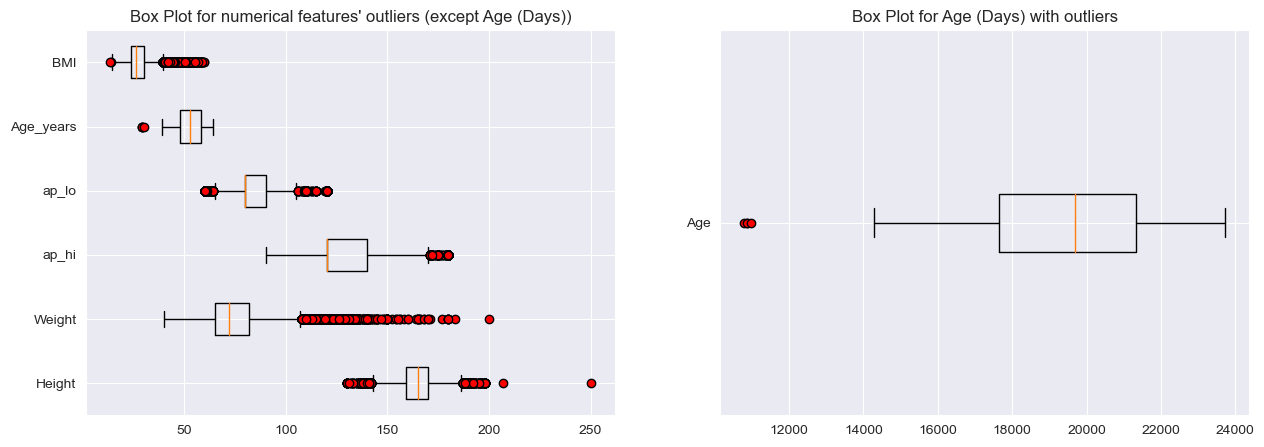

In [102]:
# Box Plot for numerical features' outliers

# Create a new figure for the box plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Box plots for features (except 'age') with outliers displayed
axs[0].boxplot([df['height'], df['weight'], df['ap_hi'], df['ap_lo'], df['age_years'], df['bmi']], labels=['Height', 'Weight', 'ap_hi', 'ap_lo', 'Age_years', 'BMI'], vert=False, flierprops=dict(markerfacecolor='red', marker='o'))

# Box plot for the 'age' feature with outliers displayed
axs[1].boxplot(df['age'], labels=['Age'], vert=False, flierprops=dict(markerfacecolor='red', marker='o'))

# Set titles for the subplots
axs[0].set_title("Box Plot for numerical features' outliers (except Age (Days))")
axs[1].set_title("Box Plot for Age (Days) with outliers")

plt.show()

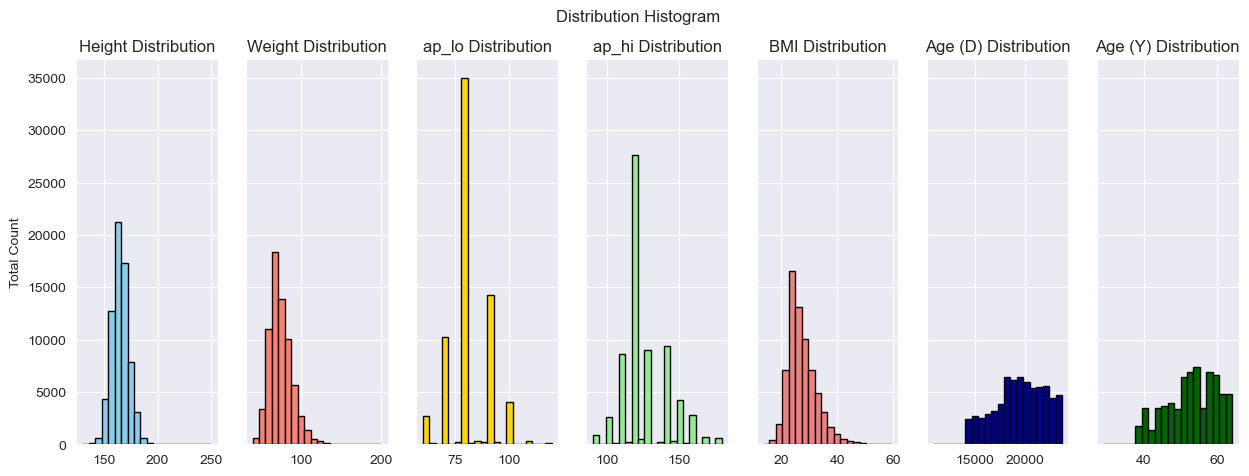

In [103]:
# Create subplots for distribution histograms of numerical features

# Setting up a subplot with 1 row and 7 columns
fig, axs = plt.subplots(1, 7, figsize=(15, 5), sharey=True)

# Create histograms for each feature and add them to the subplot
axs[0].hist(df['height'], bins=20, color='skyblue', edgecolor='black')
axs[1].hist(df['weight'], bins=20, color='salmon', edgecolor='black')
axs[2].hist(df['ap_lo'], bins=20, color='gold', edgecolor='black')
axs[3].hist(df['ap_hi'], bins=20, color='lightgreen', edgecolor='black')
axs[4].hist(df['bmi'], bins=20, color='lightcoral', edgecolor='black')
axs[5].hist(df['age'], bins=20, color='darkblue', edgecolor='black')
axs[6].hist(df['age_years'], bins=20, color='darkgreen', edgecolor='black')

# Set titles for the subplots
axs[0].set_title("Height Distribution")
axs[1].set_title("Weight Distribution")
axs[2].set_title("ap_lo Distribution")
axs[3].set_title("ap_hi Distribution")
axs[4].set_title("BMI Distribution")
axs[5].set_title("Age (D) Distribution")
axs[6].set_title("Age (Y) Distribution")

# Set common y-axis label
axs[0].set_ylabel("Total Count")

# Set common title for the entire figure
plt.suptitle("Distribution Histogram")

plt.show()

In [104]:
# Function to identify outliers in numerical features
def outliers(df_out, drop=False):
    # Loop through each feature in the DataFrame
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]

        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the outlier step as 1.5 times the IQR
        outlier_step = IQR * 1.5

        # Identify the indices of outliers
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()

        # Print the number of outliers for each feature
        print('Feature: {} | Number of Outliers using IQR method: {}'.format(each_feature, len(outliers)))

# Identify outliers for the 'height' and 'weight' features in the DataFrame
outliers(df[['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])

Feature: age_years | Number of Outliers using IQR method: 4
Feature: height | Number of Outliers using IQR method: 407
Feature: weight | Number of Outliers using IQR method: 1636
Feature: bmi | Number of Outliers using IQR method: 1875
Feature: ap_hi | Number of Outliers using IQR method: 643
Feature: ap_lo | Number of Outliers using IQR method: 3173


In [122]:
# Transformations (log and std) are applied to reduce the impact of extreme values and improve the data distribution

# Create a copy of the DataFrame to modify without affecting the original
outlier_free_df_log = df.copy()
outlier_free_df_std = df.copy()

# Apply the logarithm transformation to the numerical features
outlier_free_df_log[['height', 'weight', 'bmi', 'ap_lo', 'ap_hi']] = np.log(outlier_free_df_log[['height', 'weight', 'bmi', 'ap_lo', 'ap_hi']])

# Apply the scalar transformation to the numerical features
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
outlier_free_df_std[['height', 'weight', 'bmi', 'ap_lo', 'ap_hi']] = scaler.fit_transform(outlier_free_df_std[['height', 'weight', 'bmi', 'ap_lo', 'ap_hi']])

# Identify outliers in the transformed numerical features
print('Number of outliers in numerical features after applying logarithm transformation')
outliers(outlier_free_df_log[['height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])
print('________________________________________________________________')
print('Number of outliers in numerical features after applying scaler transformation')
outliers(outlier_free_df_std[['height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])

Number of outliers in numerical features after applying logarithm transformation
Feature: height | Number of Outliers using IQR method: 373
Feature: weight | Number of Outliers using IQR method: 1033
Feature: bmi | Number of Outliers using IQR method: 986
Feature: ap_hi | Number of Outliers using IQR method: 1554
Feature: ap_lo | Number of Outliers using IQR method: 3274
________________________________________________________________
Number of outliers in numerical features after applying scaler transformation
Feature: height | Number of Outliers using IQR method: 407
Feature: weight | Number of Outliers using IQR method: 1636
Feature: bmi | Number of Outliers using IQR method: 1875
Feature: ap_hi | Number of Outliers using IQR method: 643
Feature: ap_lo | Number of Outliers using IQR method: 3173


In [123]:
# Dropping outliers from the log transformed Dataframe
# outlier_free_df_log = outlier_free_df_log[(outlier_free_df_log['age_years'] > outlier_free_df_log['age_years'].quantile(0.005)) & (outlier_free_df_log['age_years'] < outlier_free_df_log['age_years'].quantile(0.995))]
outlier_free_df_log = outlier_free_df_log[(outlier_free_df_log['weight'] > outlier_free_df_log['weight'].quantile(0.005)) & (outlier_free_df_log['weight'] < outlier_free_df_log['weight'].quantile(0.995))]
outline_free_df_log = outlier_free_df_log[(outlier_free_df_log['height'] > outlier_free_df_log['height'].quantile(0.005)) & (outlier_free_df_log['height'] < outlier_free_df_log['height'].quantile(0.995))]
outlier_free_df_log = outlier_free_df_log[(outlier_free_df_log['bmi'] > outlier_free_df_log['bmi'].quantile(0.005)) & (outlier_free_df_log['bmi'] < outlier_free_df_log['bmi'].quantile(0.995))]
outlier_free_df_log = outlier_free_df_log[(outlier_free_df_log['ap_lo'] > outlier_free_df_log['ap_lo'].quantile(0.005)) & (outlier_free_df_log['ap_lo'] < outlier_free_df_log['ap_lo'].quantile(0.995))]
outlier_free_df_log = outlier_free_df_log[(outlier_free_df_log['ap_hi'] > outlier_free_df_log['ap_hi'].quantile(0.005)) & (outlier_free_df_log['ap_hi'] < outlier_free_df_log['ap_hi'].quantile(0.995))]
outliers(outline_free_df_log[['height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])
print('Total number of deleted outliers in log transformed Dataframe: {} '.format(len(df)-len(outlier_free_df_log)))

Feature: height | Number of Outliers using IQR method: 0
Feature: weight | Number of Outliers using IQR method: 304
Feature: bmi | Number of Outliers using IQR method: 613
Feature: ap_hi | Number of Outliers using IQR method: 1476
Feature: ap_lo | Number of Outliers using IQR method: 3150
Total number of deleted outliers in log transformed Dataframe: 6706 


In [124]:
# Dropping outliers from the log transformed Dataframe
# outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['age_years'] > outlier_free_df_std['age_years'].quantile(0.005)) & (outlier_free_df_std['age_years'] < outlier_free_df_std['age_years'].quantile(0.995))]
outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['weight'] > outlier_free_df_std['weight'].quantile(0.005)) & (outlier_free_df_std['weight'] < outlier_free_df_std['weight'].quantile(0.995))]
outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['height'] > outlier_free_df_std['height'].quantile(0.005)) & (outlier_free_df_std['height'] < outlier_free_df_std['height'].quantile(0.995))]
outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['bmi'] > outlier_free_df_std['bmi'].quantile(0.005)) & (outlier_free_df_std['bmi'] < outlier_free_df_std['bmi'].quantile(0.995))]
outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['ap_lo'] > outlier_free_df_std['ap_lo'].quantile(0.005)) & (outlier_free_df_std['ap_lo'] < outlier_free_df_std['ap_lo'].quantile(0.995))]
outlier_free_df_std = outlier_free_df_std[(outlier_free_df_std['ap_hi'] > outlier_free_df_std['ap_hi'].quantile(0.005)) & (outlier_free_df_std['ap_hi'] < outlier_free_df_std['ap_hi'].quantile(0.995))]
outliers(outlier_free_df_std[['height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])
print('Total number of deleted outliers in std transformed Dataframe: {} '.format(len(df)-len(outlier_free_df_std)))

Feature: height | Number of Outliers using IQR method: 0
Feature: weight | Number of Outliers using IQR method: 900
Feature: bmi | Number of Outliers using IQR method: 1091
Feature: ap_hi | Number of Outliers using IQR method: 33
Feature: ap_lo | Number of Outliers using IQR method: 39
Total number of deleted outliers in std transformed Dataframe: 7339 


In [125]:
# Using log transformation we lose fewer data samples, so we will continue with log transformed Dataframe
outlier_free_df_log = outlier_free_df_log[outlier_free_df_log['ap_lo']>=0]
outlier_free_df_log = outlier_free_df_log[outlier_free_df_log['ap_hi']>=0]

# Systolic blood pressure - Diastolic blood pressure = Pulse Pressure => can't be negative, Therefore we must have ap_hi > ap_lo
print('Number of data samples in which ap_hi is less than ap_lo: {} '.format(len(outlier_free_df_log[outlier_free_df_log['ap_hi'] < outlier_free_df_log['ap_lo']])))
cleaned_data_log = outlier_free_df_log[outlier_free_df_log['ap_hi'] >= outlier_free_df_log['ap_lo']].reset_index(drop=True)

# print('Total outliers related to the ap_lo and ap_hi values: {}'.format(len(cleaned_data[(cleaned_data["ap_hi"]>250) | (cleaned_data["ap_lo"]>200)])))
# cleaned_data = cleaned_data[(cleaned_data["ap_hi"]<=200) & (cleaned_data["ap_lo"]<=140)]
# cleaned_data = cleaned_data[(cleaned_data["ap_hi"]>=80) & (cleaned_data["ap_lo"]>=50)]
print('Total data samples after cleaning the Dataframe : {} | Number of features: {}'.format(cleaned_data_log.shape[0], cleaned_data_log.shape[1]))

Number of data samples in which ap_hi is less than ap_lo: 0 
Total data samples after cleaning the Dataframe : 61323 | Number of features: 17


In [126]:
cleaned_data_log.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,18393,2,5.123964,4.127134,4.700480,4.382027,1,1,0,0,1,50,3.089547,0,1,0,0
1,20228,1,5.049856,4.442651,4.941642,4.499810,3,1,0,0,1,55,3.553280,0,0,1,0
2,18857,1,5.105945,4.158883,4.867534,4.248495,3,1,0,0,0,51,3.157333,0,1,0,0
3,17623,2,5.129899,4.406719,5.010635,4.605170,1,1,0,0,1,48,3.357262,0,0,1,0
4,21914,1,5.017280,4.204693,4.787492,4.382027,2,2,0,0,0,60,3.380473,0,1,0,0


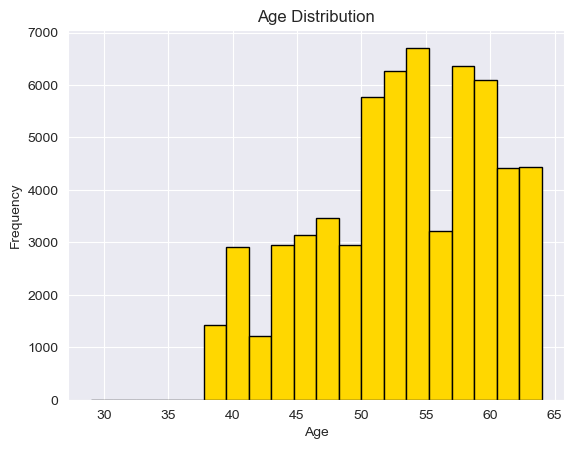

In [133]:
# Create a new figure
fig, ax = plt.subplots()

# Add a histogram for the 'age' feature
ax.hist(cleaned_data_log['age_years'], bins=20, color='gold', edgecolor='black')

# Set title and labels
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")

# Show the plot
plt.show()

In [129]:
print('Final data samples: {} | Number of features: {}'.format(cleaned_data_log.shape[0], df.shape[1]))

Final data samples: 61323 | Number of features: 17


| Preprocessing                             | Total Data samples | Lost data samples |
|-------------------------------------------|:------------------:|------------------:|
| Duplicates Removed                        |       68053        |                24 |
| Outliner Removed                          |       68029        |              6706 |
| Negative Values (ap_hi and ap_lo) Removed |       61323        |                 0 |
| Samples with ap_hi < ap_lo Removed        |       61323        |                 0 |

In [110]:
# data-label separation
labels = df['cardio'].to_numpy()
df = df.drop(columns=['cardio'])
# convert to numpy
data = df.to_numpy()
# train-test split
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.15, random_state=42)

In [111]:
# normalization
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and test data
trainx = scaler.fit_transform(trainx)
testx = scaler.transform(testx)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

# Train the model on the training set
model.fit(trainx, trainy)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.728858402743753
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      5136
           1       0.76      0.67      0.71      5069

    accuracy                           0.73     10205
   macro avg       0.73      0.73      0.73     10205
weighted avg       0.73      0.73      0.73     10205

